# Machine learning

# Carnatic music classification

# Random Forest Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df=pd.read_excel('CMRfullDataset.xlsx')
df_train = df.drop(['MBID of the recording', 'Name','Artist','Release+Volume','Lead Instrument Code','Raaga'], axis = 1)
X = df_train .drop('Taala',axis=1).values
y = df_train ['Taala'].values

#X_train=df.drop('Taala',axis=1).values
#y_train=df['Taala'].values

In [3]:
df

,UID,MBID of the recording,Name,Artist,Release+Volume,Lead Instrument Code,Taala,Raaga,Excerpt Start Time (s),Excerpt End Time (s),Length of the excerpt (s),Length of the excerpt (min),Number of annotated beats,Number of samas
0,10001,6fb02d72-120f-415a-bf46-cd455a61165c,05_Thunga_Theera_Virajam,AbhishekRaghuram,Gems Of Carnatic Music - Live In Concert 2006,V,0,salaga bhairavi,26,175,149,2.48,193,25
1,10002,3ba1767b-f6c3-43dc-856f-1df72863650f,1_Salamelae_-_Varnam,AlathurBrothers,Alathur Brothers,V,0,nattakurinji,16,253,237,3.95,368,46
2,10003,5769ea2f-aed4-4169-9a20-bae4cb733b8e,1-04_Shri_Visvanatham,AmrithaMurali,December Season 2010/CD 1,V,0,chaturdasha ragamalika,54,406,352,5.87,481,61
3,10004,40ecccaf-46d9-42a3-a709-e5202a1e22ec,1_Vathapi,AneeshVidyashankar,Pure Expressions,L,0,hamsadhwani,43,553,510,8.50,825,104
4,10005,de94ed93-7399-47e3-aa8e-d77b49d94bd3,2_Jagadanandakaraka,Aneesh Vidyashankar,Pure Expressions,L,0,nattai,3,517,514,8.57,705,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,13024,5d1e6f5e-a588-461a-afc4-4d42a68e0adb,10-01_Vaa_Velava,Sanjay Subrahmanyan,December Season 2010 - Concert 4/CD 2,V,3,tanarupi,61,316,255,4.25,397,133
172,13025,aa97b27e-4fd3-4130-865d-77a16ac59246,4_Amma_Ravamma,Sikkil Mala Chandrasekhar,Resonance Flute Concert,F,3,kalyani,815,1230,415,6.92,703,235
173,13026,bbee764d-7406-47ce-821a-a82030b89eca,2_Anupama_Gunambudhi,Sowmya,Bharat Sangeet Utsav,V,3,atana,69,198,129,2.15,223,75
174,13027,c5e32bf4-2cb1-47fc-a3fd-c855e0e2cd40,1-05_Paridanamiccite,Sumithra Vasudev,December Season 2010/CD 1,V,3,bilahari,3,268,265,4.42,487,163


In [3]:
df_train 

,UID,Taala,Excerpt Start Time (s),Excerpt End Time (s),Length of the excerpt (s),Length of the excerpt (min),Number of annotated beats,Number of samas
0,10001,0,26,175,149,2.48,193,25
1,10002,0,16,253,237,3.95,368,46
2,10003,0,54,406,352,5.87,481,61
3,10004,0,43,553,510,8.50,825,104
4,10005,0,3,517,514,8.57,705,89
...,...,...,...,...,...,...,...,...
171,13024,3,61,316,255,4.25,397,133
172,13025,3,815,1230,415,6.92,703,235
173,13026,3,69,198,129,2.15,223,75
174,13027,3,3,268,265,4.42,487,163


# Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=0)

In [7]:
y_predtrain = classifier.predict(X_train)
print(np.concatenate((y_predtrain.reshape(len(y_predtrain),1), y_train.reshape(len(y_train),1)),1))

[[3 3]
 [0 0]
 [2 2]
 [3 3]
 [2 2]
 [1 1]
 [3 3]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [3 3]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [3 3]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [3 3]
 [1 1]
 [3 3]
 [3 3]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [3 3]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [3 3]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [3 3]
 [0 0]
 [0 0]
 [1 1]
 [3 3]
 [0 0]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [3 3]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [3 3]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [3 3]
 [0 0]
 [2 2]
 [3 3]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [3 3]
 [3 3]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [3 3]
 [3 3]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [3 3]]


In [8]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [3 3]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [2 3]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [2 3]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 2]
 [1 1]
 [2 2]
 [2 2]
 [3 3]
 [2 2]
 [3 3]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [3 3]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [3 3]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [0 0]]


In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_predtrain)
print(cm)
accuracy=accuracy_score(y_train, y_predtrain)

[[35  0  0  0]
 [ 0 35  0  0]
 [ 0  0 32  0]
 [ 0  0  0 21]]


In [10]:
accuracy

1.0

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
val_accuracy=accuracy_score(y_test, y_pred)

[[14  1  0  0]
 [ 0 15  0  0]
 [ 0  1 15  0]
 [ 0  0  2  5]]


In [12]:
val_accuracy

0.9245283018867925

In [15]:
from sklearn.metrics import classification_report

value=(classification_report(y_test,y_pred))

In [16]:
print(value)

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.88      1.00      0.94        15
           2       0.88      0.94      0.91        16
           3       1.00      0.71      0.83         7

    accuracy                           0.92        53
   macro avg       0.94      0.90      0.91        53
weighted avg       0.93      0.92      0.92        53



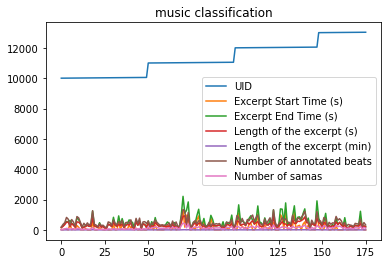

In [33]:
# get columns to plot
columns = df_train.columns.drop(['Taala'])
# create x data
x_data = range(0, df_train.shape[0])
# create figure and axis
fig, ax = plt.subplots()
# plot each column
for column in columns:
    ax.plot(x_data, df_train[column], label=column)
# set title and legend
ax.set_title('music classification')
ax.legend()

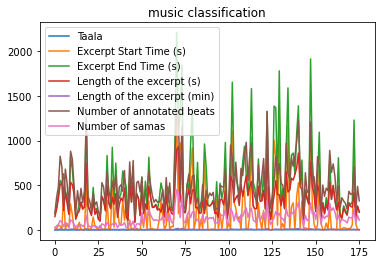

In [34]:
# get columns to plot
columns = df_train.columns.drop(['UID'])
# create x data
x_data = range(0, df_train.shape[0])
# create figure and axis
fig, ax = plt.subplots()
# plot each column
for column in columns:
    ax.plot(x_data, df_train[column], label=column)
# set title and legend
ax.set_title('music classification')
ax.legend()

# Training the Kernel SVM model on the Training set

In [35]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [49]:
X_train

array([[ 1.57571097e+00, -3.82295295e-01, -4.04200625e-01,
        -3.02216630e-01, -3.01073023e-01, -1.36248773e-01,
         3.43923699e-01],
       [-1.24497993e+00, -1.64332252e-01, -1.36154226e-01,
        -3.62333183e-02, -3.50641506e-02, -3.78591261e-01,
        -9.61557595e-01],
       [ 6.30127716e-01, -6.16285034e-01, -5.55030965e-02,
         9.98146226e-01,  9.97050275e-01,  7.71508680e-01,
         5.57319680e-01],
       [ 1.57854488e+00, -6.16285034e-01, -4.44526190e-01,
         2.87848245e-02,  2.87779788e-02,  5.82563690e-01,
         1.08453328e+00],
       [ 6.48075849e-01,  2.59866986e+00,  2.02482162e+00,
         2.53392954e-01,  2.52225432e-01,  1.96458709e-01,
         1.17975014e-01],
       [-3.01285958e-01, -4.25293744e-02,  1.37961258e+00,
         3.51612157e+00,  3.51526760e+00,  3.06349356e+00,
         3.60762694e+00],
       [ 1.58043416e+00, -6.09874356e-01, -4.65875018e-01,
        -3.62333183e-02, -3.50641506e-02,  3.97726199e-01,
         8.9624270

In [50]:
X_test

array([[-0.31734481,  0.41262875,  0.66798497,  0.90357438,  0.90483387,
         0.63185369,  1.1347441 ],
       [ 1.5690985 , -0.41434868, -0.15513096,  0.3775185 ,  0.37636291,
         0.3854037 ,  0.88369   ],
       [-0.30884307, -0.60987436, -0.90945623, -1.14154175, -1.14166106,
        -1.10561872, -0.63518727],
       [-0.31640018, -0.59384766, -0.3828518 ,  0.14108889,  0.1422751 ,
         0.01572872,  0.50710886],
       [ 0.64429729,  0.91266161,  1.88724028,  3.01961939,  3.01871771,
         3.38387855,  2.55319974],
       [ 0.62445988, -0.597053  ,  0.18882238,  1.57148803,  1.57162944,
         1.83945863,  1.37324549],
       [-1.25914951, -0.39832199, -0.39471226, -0.24901997, -0.24787125,
         0.07734122, -0.79837243],
       [ 1.57760025,  0.15620164,  0.58021757,  1.15773621,  1.1566556 ,
         1.59300864,  2.11385507],
       [ 0.6518544 , -0.58743698, -0.59396799, -0.39678847, -0.39683622,
         0.09787871,  0.04265879],
       [-0.28428246, -0.6194

In [36]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [3 3]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [3 3]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [3 3]
 [1 1]
 [0 0]
 [2 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [3 3]
 [2 2]
 [3 3]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [3 3]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [3 3]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [0 0]]


In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy2=accuracy_score(y_test, y_pred)

[[14  0  1  0]
 [ 0 15  0  0]
 [ 0  0 16  0]
 [ 0  0  0  7]]


In [41]:
accuracy2

0.9811320754716981

# K-Nearest Neighbors (K-NN)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [43]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 1]
 [3 3]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [2 3]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [3 3]
 [1 1]
 [1 0]
 [2 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 2]
 [1 1]
 [2 2]
 [2 2]
 [3 3]
 [2 2]
 [3 3]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [3 3]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [3 3]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [0 0]]


In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy3=accuracy_score(y_test, y_pred)

[[13  1  1  0]
 [ 0 14  1  0]
 [ 0  1 15  0]
 [ 0  0  1  6]]


In [46]:
accuracy3

0.9056603773584906

In [51]:
accuracy

0.9811320754716981

In [53]:
accuracy2

0.9811320754716981

In [88]:
X_train

array([[ 1.57571097e+00, -3.82295295e-01, -4.04200625e-01,
        -3.02216630e-01, -3.01073023e-01, -1.36248773e-01,
         3.43923699e-01],
       [-1.24497993e+00, -1.64332252e-01, -1.36154226e-01,
        -3.62333183e-02, -3.50641506e-02, -3.78591261e-01,
        -9.61557595e-01],
       [ 6.30127716e-01, -6.16285034e-01, -5.55030965e-02,
         9.98146226e-01,  9.97050275e-01,  7.71508680e-01,
         5.57319680e-01],
       [ 1.57854488e+00, -6.16285034e-01, -4.44526190e-01,
         2.87848245e-02,  2.87779788e-02,  5.82563690e-01,
         1.08453328e+00],
       [ 6.48075849e-01,  2.59866986e+00,  2.02482162e+00,
         2.53392954e-01,  2.52225432e-01,  1.96458709e-01,
         1.17975014e-01],
       [-3.01285958e-01, -4.25293744e-02,  1.37961258e+00,
         3.51612157e+00,  3.51526760e+00,  3.06349356e+00,
         3.60762694e+00],
       [ 1.58043416e+00, -6.09874356e-01, -4.65875018e-01,
        -3.62333183e-02, -3.50641506e-02,  3.97726199e-01,
         8.9624270

In [89]:
y_test

array([1, 3, 1, 1, 2, 2, 0, 3, 2, 1, 2, 2, 0, 1, 3, 1, 0, 0, 1, 1, 1, 0,
       0, 2, 1, 2, 2, 3, 2, 3, 0, 1, 2, 0, 0, 0, 1, 2, 1, 3, 0, 0, 1, 2,
       3, 0, 2, 1, 2, 0, 2, 2, 0], dtype=int64)

In [106]:
train_sizes = [1, 100, 140]

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
features = ['UID', 'Excerpt Start Time (s)', 'Excerpt End Time (s)', 'Length of the excerpt (s)','Length of the excerpt (min)','Number of annotated beats','Number of samas']
target = 'Taala'
train_sizes, train_scores, validation_scores = learning_curve(
estimator = LinearRegression(),
X = df_train[features],
y = df_train[target], train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')

In [109]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)


Training scores:

 [[-0.         -0.         -0.         -0.         -0.        ]
 [-0.0001456  -0.00011119 -0.00013674 -0.00020209 -0.00020209]
 [-0.000153   -0.00015139 -0.00014914 -0.00020447 -0.00018581]]

 ----------------------------------------------------------------------

Validation scores:

 [[-0.00000000e+00 -6.00000000e-01 -1.51428571e+00 -4.00000000e+00
  -8.00000000e+00]
 [-7.25357354e-04 -5.73045279e-04 -4.72121792e-04 -2.08440461e-04
  -5.10823203e-04]
 [-6.85989947e-04 -4.30608793e-04 -4.58146519e-04 -1.18021856e-04
  -1.76252537e-04]]


In [111]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1     -0.000000
100    0.000160
140    0.000169
dtype: float64

 --------------------

Mean validation scores

 1      2.822857
100    0.000498
140    0.000374
dtype: float64


(0.0, 40.0)

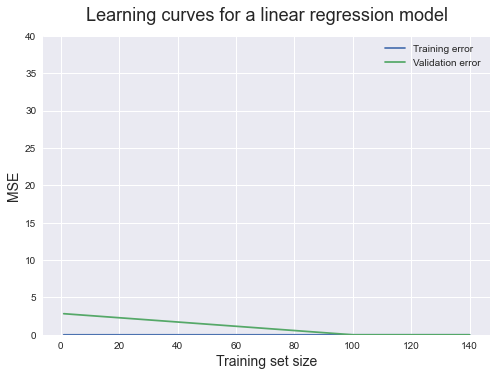

In [112]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,40)